# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [1]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopy.distance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [2]:
URL = 'https://api.hh.ru/vacancies'

jobs = ['парикмахер', 'охранник', 'повар', 'тренер', 'официант']

def get_params(job_name, page_num = 0, per_page = 100):
  return {
      'text': job_name,
      'area': 1,
      'page': page_num,
      'per_page': per_page
  }

result = []
for name in jobs:
  cnt = requests.get(URL, get_params(name)).json()['pages']
  sleep(0.2)
  for page_num in range(cnt):
    result.extend(requests.get(URL, get_params(name, page_num)).json()['items'])
    sleep(0.2)

(1 балл) Посчитайте сколько всего найдено вакансий:

In [3]:
len(result)

7219

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [4]:
class Company:
   def __init__(self, name, lat, lng, salary = None):
    self.name = name
    self.lat = lat
    self.lng = lng
    self.salary = salary



(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [5]:
vacancies = []

def exists(name):
  for x in vacancies:
    if x.name == name:
      return True
  return False

for elem in result:
  if not exists(elem['employer']['name']):
    c_name = elem['employer']['name']
    if not(elem['address'] is None):
      c_lat = elem['address']['lat']
      c_lng = elem['address']['lng']
      if not(elem['salary'] is None):
        c_salary = elem['salary']['from']
        vacancies.append(Company(c_name, c_lat, c_lng, c_salary))
      else:
        vacancies.append(Company(c_name, c_lat, c_lng))


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [6]:
len(vacancies)

2705

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [7]:
center_coords = (55.7522200, 37.6155600)

moscow_vacancies = []

for elem in vacancies:
  if (geopy.distance.distance(center_coords, (elem.lat, elem.lng)).km < 15):
    moscow_vacancies.append(elem)

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

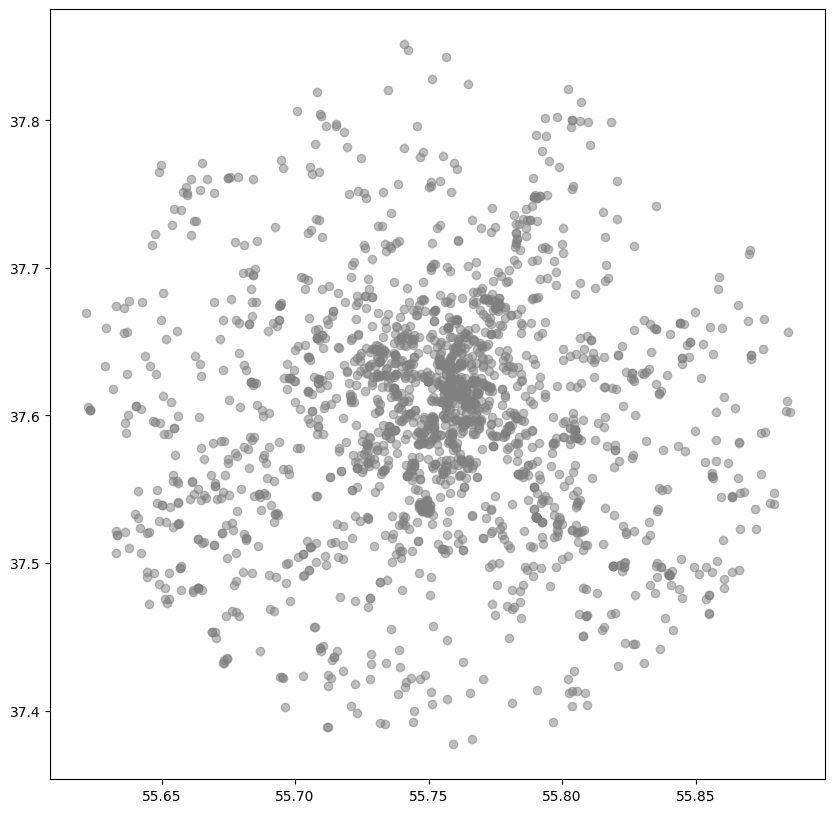

In [8]:
plt.figure(figsize=(10, 10))

for elem in moscow_vacancies:
  plt.scatter(elem.lat, elem.lng, c='grey', alpha=0.5)

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

190000 1700


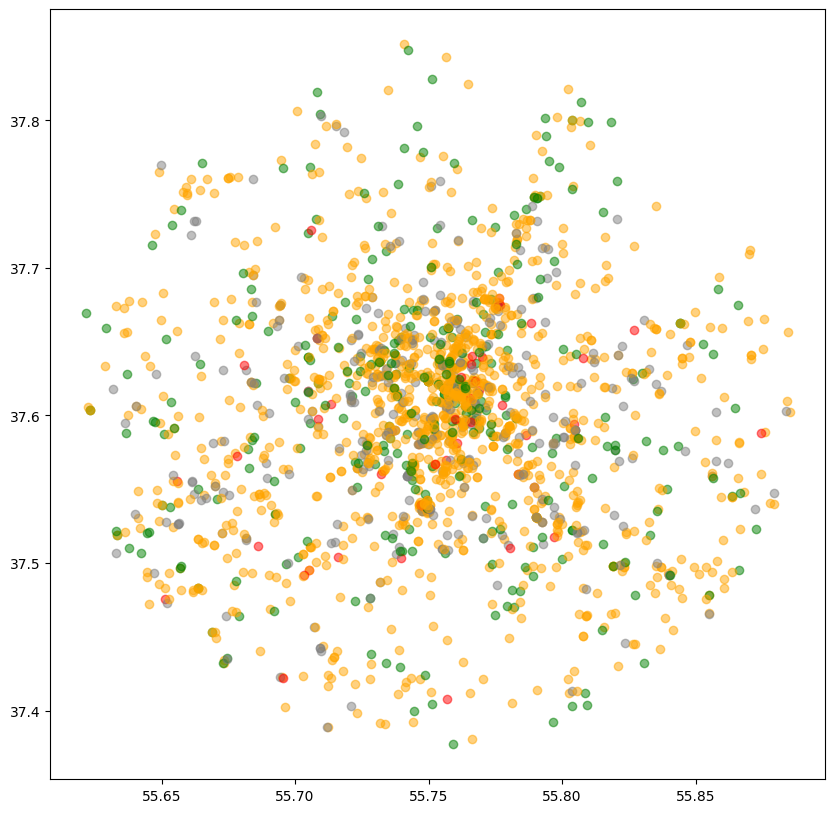

In [9]:
plt.figure(figsize=(10, 10))

colors = ['red', 'orange', 'green']
colors = colors[::-1]
salaries = []
salary_limit = 200000

for x in moscow_vacancies:
  if not(x.salary is None) and x.salary < salary_limit:
    salaries.append(x.salary)

min_salary = min(salaries)
max_salary = max(salaries)
print(max_salary, min_salary)

for elem in moscow_vacancies:
  if not(elem.salary is None) and elem.salary < salary_limit:
    color = colors[round((len(colors) - 1) * (elem.salary - min_salary) / (max_salary - min_salary))]
    plt.scatter(elem.lat, elem.lng, c=color, alpha=0.5)
  else:
    plt.scatter(elem.lat, elem.lng, c='grey', alpha=0.5)

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Выборку пришлось ограничить зарплатой в 200 тысяч рублей, иначе из-за выбросов почти все вакансии попадали в зеленую зону, график не имел бы смысла.

Вакансий в центре Москвы гораздо больше, чем на периферии. Большинство зарплат находятся в среднем диапазоне(оранжевые), на втором месте -- зарплаты ниже среднего(зеленые), зарплаты выше среднего(красные) довольно редки. Спрос в центре города на порядок выше, чем на окраине. 

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [10]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 146MB/s]


Создадим DataFrame:

In [11]:
diamonds = pd.read_csv("diamonds.csv")
diamonds = diamonds.replace({"None": np.nan})
diamonds = diamonds.replace({"unknown": np.nan})


(0.5 балла) Выведете первые 5 строк датасета:

In [12]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,NaN,...,1.79,M,M,NaN,NaN,NaN,NaN,NaN,NaN,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,NaN,...,1.78,STK,STK,NaN,NaN,NaN,NaN,NaN,NaN,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,NaN,...,1.77,TN,M,NaN,NaN,NaN,NaN,NaN,NaN,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,NaN,...,1.78,M,STK,NaN,NaN,NaN,NaN,NaN,NaN,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,NaN,...,1.82,STK,STK,NaN,NaN,NaN,NaN,NaN,NaN,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [13]:
len(diamonds)

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [14]:
max_index = diamonds.total_sales_price.idxmax()
max_price = diamonds.total_sales_price.max()
min_index = diamonds.total_sales_price.idxmin()
min_price = diamonds.total_sales_price.min()
print(f"Maximum price: {max_index} - {max_price}")
print(f"Minumum price: {min_index} - {min_price}")

Maximum price: 219702 - 1449881
Minumum price: 0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [15]:
cnt = 0

for col in diamonds.columns:
  for elem in diamonds[col]:
    if elem is np.nan:
      cnt += 1

cnt

1891168

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [16]:
missing = []

for col in diamonds.columns:
  for elem in diamonds[col]:
    if elem is np.nan:
      missing.append(col)
      break

missing

['color',
 'cut_quality',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [17]:
bad_cols = []

for col in diamonds.columns:
  if col.startswith("fancy_color_") or col.startswith("fluor_"):
    bad_cols.append(col)

len(bad_cols)

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [18]:
for col in bad_cols:
  cnt_ok = 0
  for elem in diamonds[col]:
    if not(elem is np.nan):
      cnt_ok += 1
  print(col, cnt_ok)


fluor_color 15726
fluor_intensity 76084
fancy_color_dominant_color 9164
fancy_color_secondary_color 1062
fancy_color_overtone 388
fancy_color_intensity 9162


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [19]:
diamonds = diamonds.drop(bad_cols, axis=1)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [20]:
bad_cols = []
for col in diamonds.columns:
  if col.startswith("culet_"):
    bad_cols.append(col)

diamonds = diamonds.drop(bad_cols, axis=1)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [21]:
diamonds['total_sales_price'].sum()

1517721991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [22]:
even_cols = diamonds.iloc[::2]
even_cols

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,NaN,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,NaN,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,NaN,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,NaN,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,NaN,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,NaN,62.1,58.0,14.84,14.91,9.24,NaN,NaN,1121792
219696,219697,Oval,H,VS2,18.88,NaN,GIA,Excellent,Excellent,NaN,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,NaN,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,NaN,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [23]:
divisible6 = diamonds.iloc[::6]
divisible6

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,NaN,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,NaN,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,NaN,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,NaN,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,NaN,0.0,0.0,0.00,0.00,0.00,NaN,NaN,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,NaN,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,NaN,I1,0.89,NaN,GIA,Good,Good,NaN,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,NaN,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,NaN,GIA,Excellent,Excellent,NaN,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [24]:
categorial = []

for col in diamonds.columns:
  if diamonds[col].dtype == "object":
    categorial.append(col)

diamonds[categorial]

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,NaN,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,NaN,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,NaN,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,NaN,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,NaN,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,NaN,M,STK
219699,Radiant,NaN,VS2,NaN,GIA,Very Good,Very Good,NaN,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,NaN,TN,M
219701,Princess,NaN,SI2,NaN,GIA,Good,Good,NaN,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [25]:
diamonds['total_sales_price'] * diamonds['total_sales_price'].T 

0                 40000
1                 40000
2                 40000
3                 40000
4                 40000
              ...      
219698    1465775118864
219699    1670556250000
219700    1730529726016
219701    1822500000000
219702    2102154914161
Name: total_sales_price, Length: 219703, dtype: int64

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

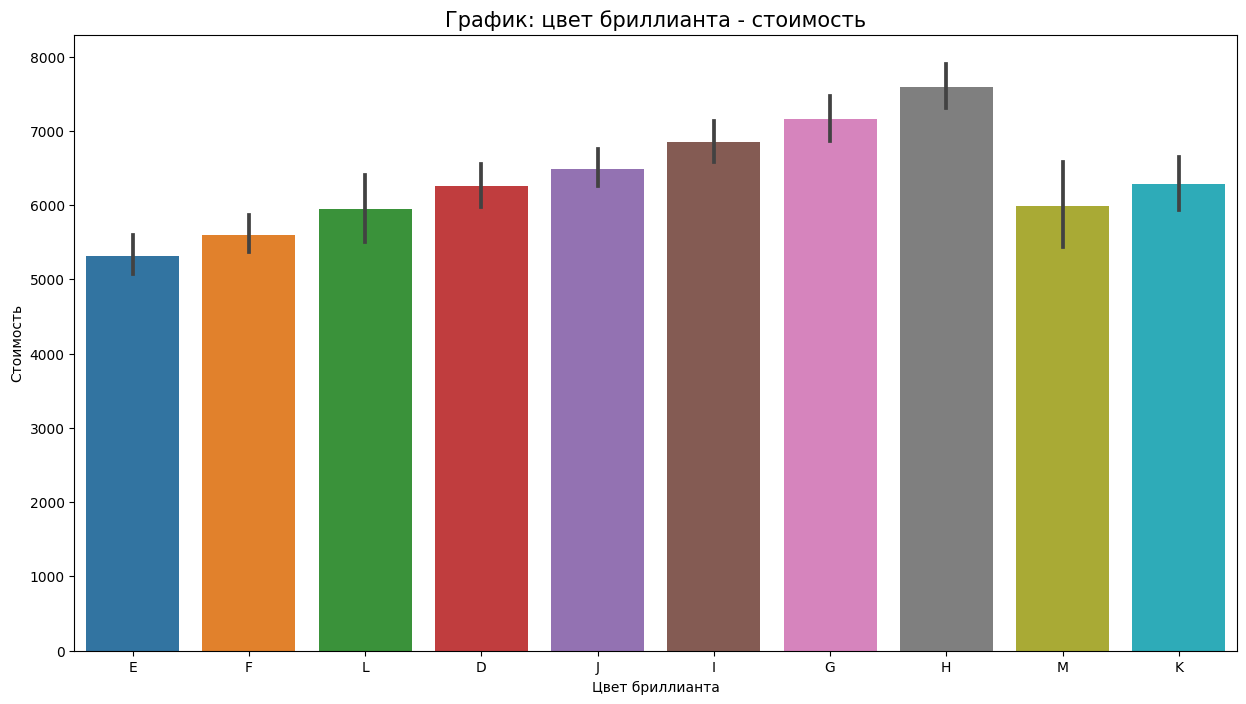

In [50]:
df1 = diamonds.dropna(subset=["color", "total_sales_price"])

plt.figure(figsize=(15,8))
sns.barplot(x="color", y="total_sales_price", data=df1)

plt.title('График: цвет бриллианта - стоимость', fontsize=15)
plt.xlabel('Цвет бриллианта')
plt.ylabel('Стоимость')
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:


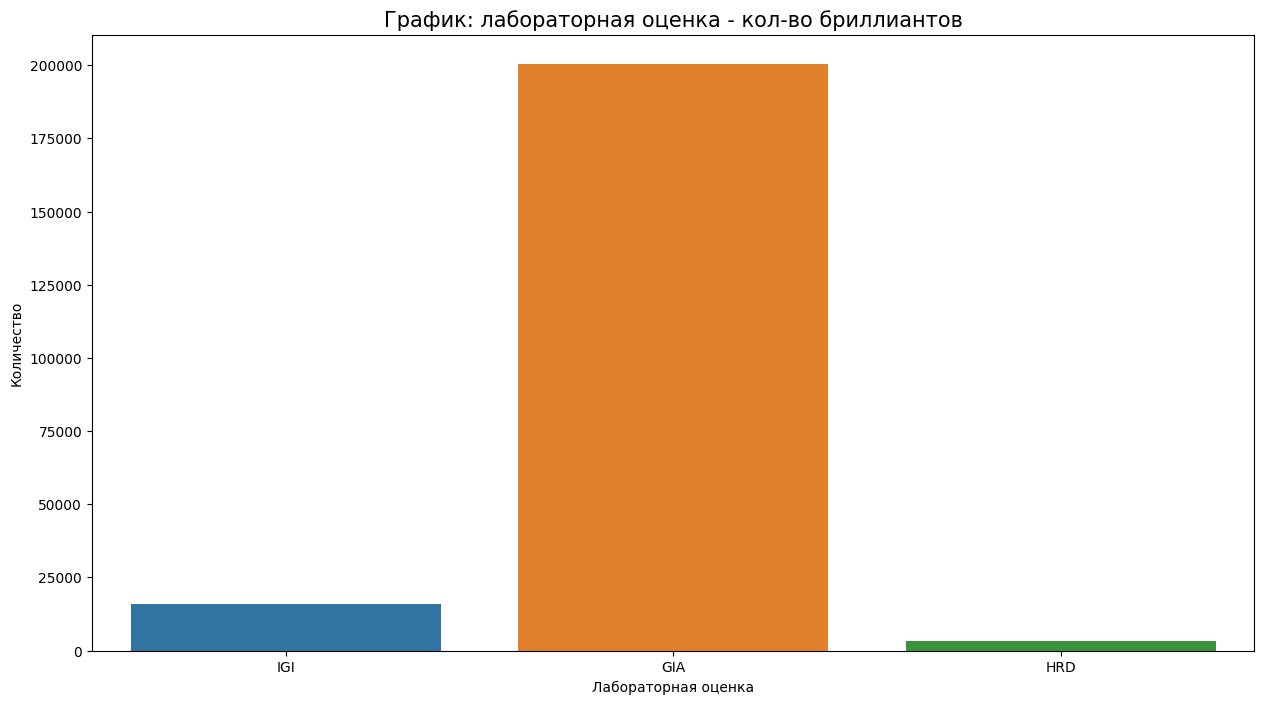

In [28]:
df2 = diamonds.dropna(subset=["lab"])

plt.figure(figsize=(15,8))
sns.countplot(x="lab", data=df2)

plt.title('График: лабораторная оценка - кол-во бриллиантов', fontsize=15)
plt.xlabel('Лабораторная оценка')
plt.ylabel('Количество')
plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

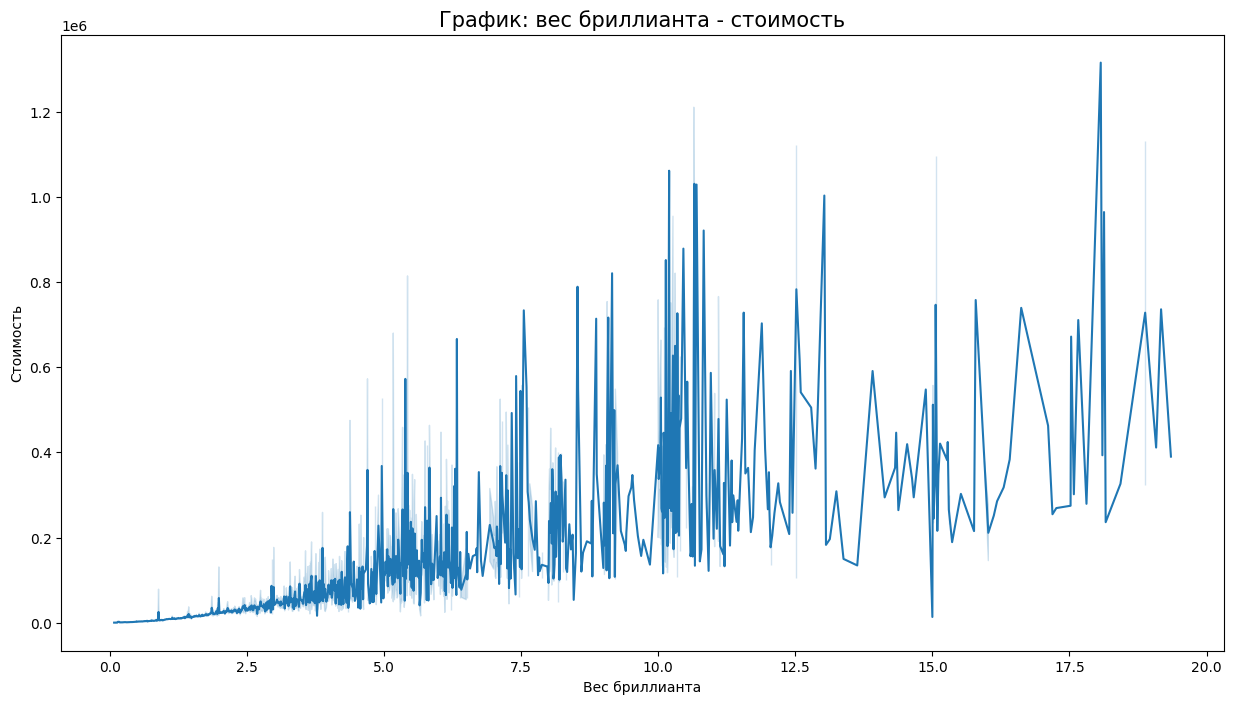

In [56]:
df3 = diamonds.dropna(subset=["carat_weight", "total_sales_price"])

plt.figure(figsize=(15,8))
sns.lineplot(x="carat_weight", y="total_sales_price", data=df3)

plt.title('График: вес бриллианта - стоимость', fontsize=15)
plt.xlabel('Вес бриллианта')
plt.ylabel('Стоимость')
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

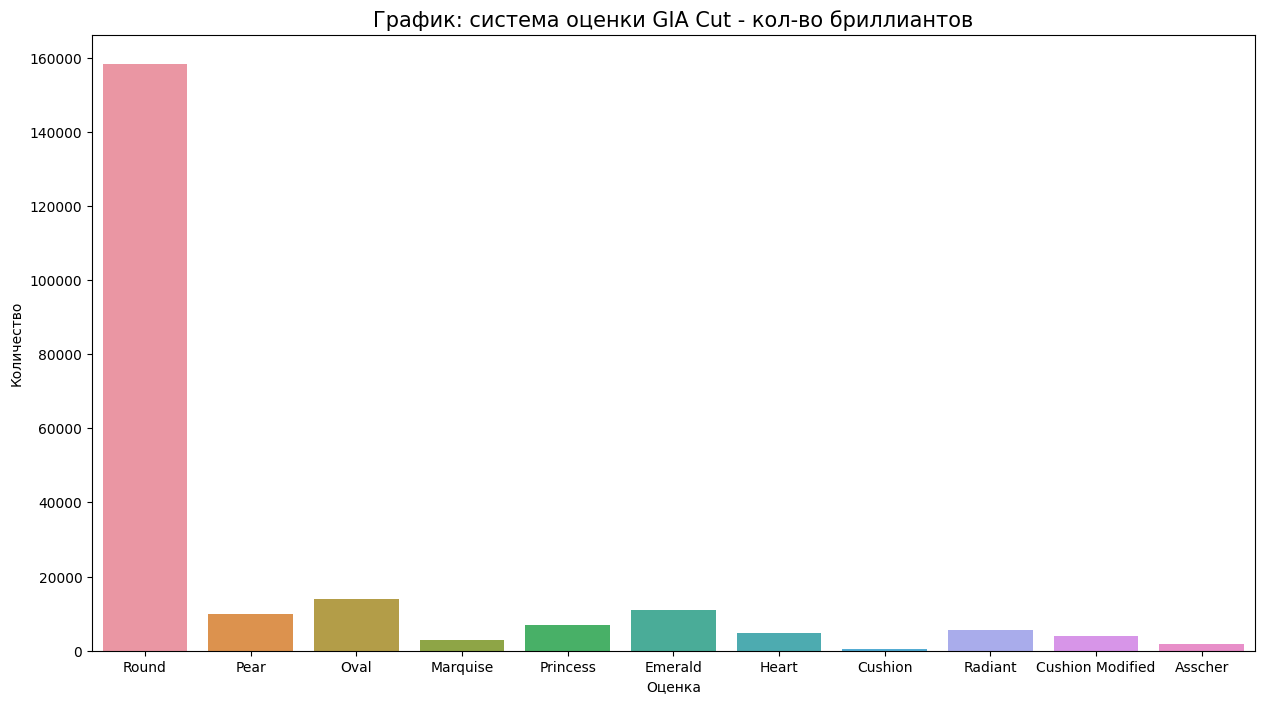

In [30]:
df4 = diamonds.dropna(subset=["cut"])

plt.figure(figsize=(15,8))
sns.countplot(x="cut", data=df4)

plt.title('График: система оценки GIA Cut - кол-во бриллиантов', fontsize=15)
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Абсолютное большинство бриллиантов имеют огранку round и имеют оценку GIA. Чем больше бриллиант, тем больше он стоит. Самые дорогие бриллианты имеют цвет H.

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [15]:
ds = diamonds[["meas_length", "meas_width", "meas_depth", "total_sales_price"]]
ds.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [16]:
ds = ds.sample(frac=1)


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [17]:
ds = ds.dropna()
ds['m_sum'] = ds.apply(lambda row: (abs(row["meas_length"] - row["meas_width"]) ** 3 
                         + abs(row["meas_length"] - row["meas_depth"]) ** 3 
                         + abs(row["meas_width"] - row["meas_depth"]) ** 3) ** (1/3), axis=1)

(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [18]:
ds2 = ds[['m_sum', 'total_sales_price']]

(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [19]:
d_train, d_test = train_test_split(ds2, test_size=0.2)

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

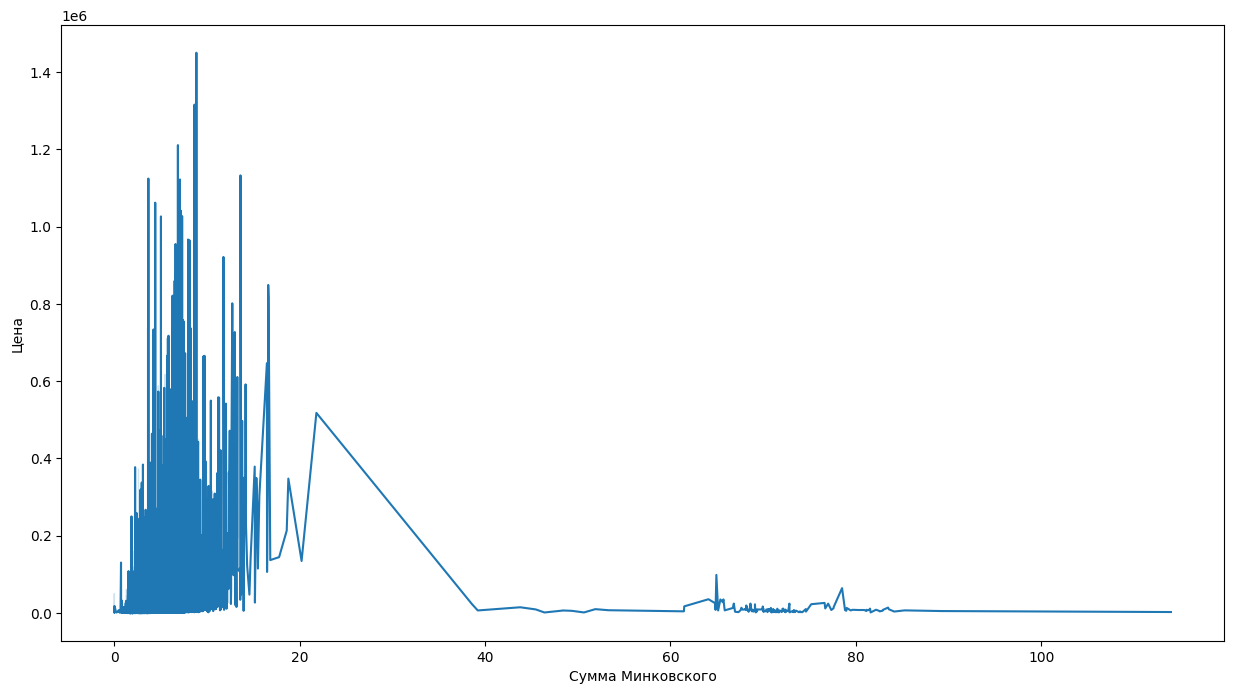

In [37]:
plt.figure(figsize=(15,8))
sns.lineplot(x="m_sum", y="total_sales_price", data=d_train)
plt.xlabel("Сумма Минковского")
plt.ylabel("Цена")
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

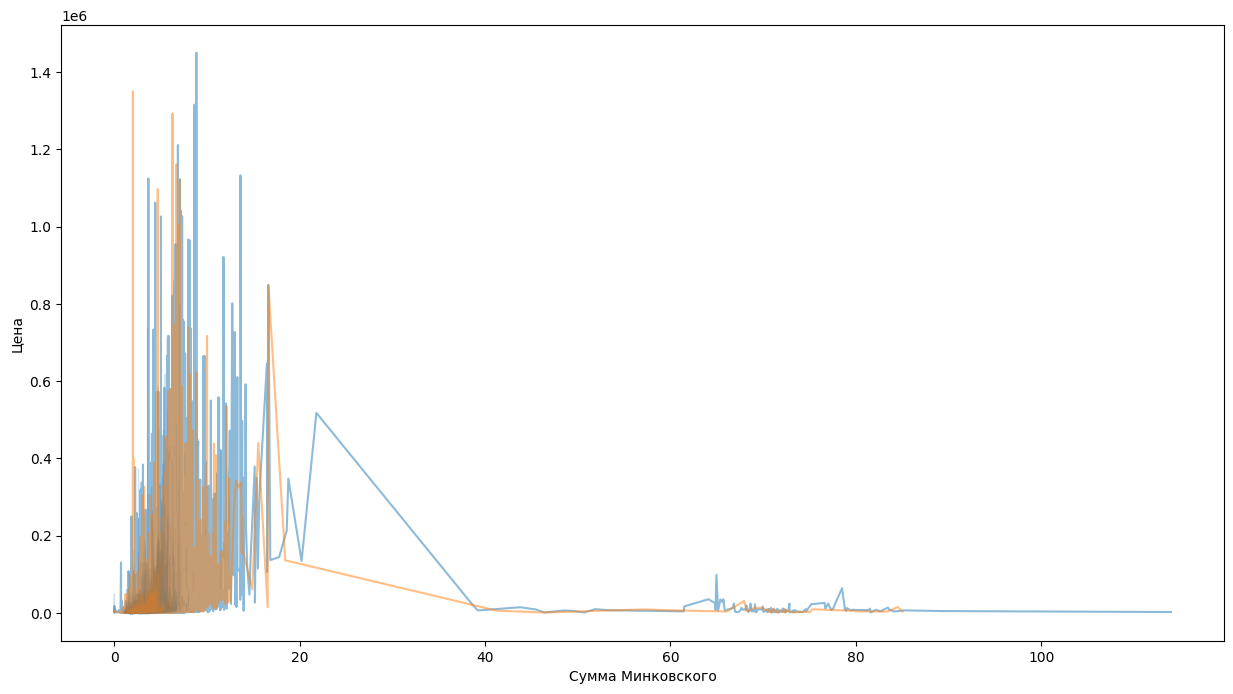

In [43]:
plt.figure(figsize=(15,8))
sns.lineplot(x="m_sum", y="total_sales_price", data=d_train, alpha=0.5)
sns.lineplot(x="m_sum", y="total_sales_price", data=d_test, alpha=0.5)
plt.xlabel("Сумма Минковского")
plt.ylabel("Цена")
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [45]:
from sklearn.neighbors import NearestNeighbors

distances, indices = NearestNeighbors(n_neighbors=1).fit(d_train).kneighbors(d_test)

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [47]:
diff = np.abs(d_test["total_sales_price"].values - d_train["total_sales_price"].values[indices].flatten())
percent = 100 * diff / d_test["total_sales_price"].values
percent

array([0.        , 0.        , 0.01420152, ..., 0.        , 0.        ,
       0.        ])

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [45]:
cropped = diamonds[['cut', 'color', 'total_sales_price']]
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(cropped[['cut', 'color']])

OneHotEncoder(handle_unknown='ignore')

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [41]:
d_train, d_test = train_test_split(cropped, test_size=0.2)

['cut',
 'color',
 'clarity',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean',
 'girdle_min',
 'girdle_max',
 'total_sales_price']

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [46]:
train_t = enc.transform(d_train[["cut", "color"]])
test_t = enc.transform(d_test[["cut", "color"]])

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_t, d_train['total_sales_price'])

DecisionTreeRegressor(random_state=0)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [47]:
for i in categorial:
  for j in categorial:
    if i != j:
      cropped = diamonds[[i, j, 'total_sales_price']]
      enc = OneHotEncoder(handle_unknown='ignore')
      enc.fit(cropped[[i, j]])
      d_train, d_test = train_test_split(cropped, test_size=0.2)
      print(i, j)
      train_t = enc.transform(d_train[[i, j]])
      test_t = enc.transform(d_test[[i, j]])
      regressor = DecisionTreeRegressor(random_state=0)
      regressor.fit(train_t, d_train['total_sales_price'])
      mse = mean_squared_error(d_test["total_sales_price"], regressor.predict(test_t))
      print(f"pair {i} {j} mse: {mse}")

cut color
pair cut color mse: 650402342.566705
cut clarity
pair cut clarity mse: 592501936.408952
cut cut_quality
pair cut cut_quality mse: 664262995.0064812
cut lab
pair cut lab mse: 626050563.2922262
cut symmetry
pair cut symmetry mse: 697947759.8585207
cut polish
pair cut polish mse: 618228795.7677879
cut eye_clean
pair cut eye_clean mse: 639086627.4751353
cut girdle_min
pair cut girdle_min mse: 614288287.5546557
cut girdle_max
pair cut girdle_max mse: 683209620.0707675
color cut
pair color cut mse: 582929283.1460803
color clarity
pair color clarity mse: 676700965.2391781
color cut_quality
pair color cut_quality mse: 668829100.8379799
color lab
pair color lab mse: 689336669.9978771
color symmetry
pair color symmetry mse: 624935571.7546098
color polish
pair color polish mse: 645987418.8827634
color eye_clean
pair color eye_clean mse: 662234258.4110135
color girdle_min
pair color girdle_min mse: 584509603.4450873
color girdle_max
pair color girdle_max mse: 713312587.5722712
clarity cu

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Наибольшую точность выдают пары (polish, cut_quality), (girdle_max, cut_quality), (symmetry, clarity), (symmetry, girdle_min). Все же нельзя сказать, что именно эти параметры подходят, так как их mse незначительно отличается от среднего. Готовые инструменты хороши, когда зависимость от параметров существует и ее можно отследить.